In [1]:
include("SCW_Analysis.jl")

┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:61
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:61


Ran once

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{ExpandedIndexTypes, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:67
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:67



Costs of Non-Veg in Baseline are [161337.33936651584, 135183.23981900452, 112568.80542986425, 92753.52036199094, 75197.80090497738, 59498.01357466063, 45344.9592760181, 32497.69230769231, 20764.615384615383, 9991.746606334842, 53.42986425339367, -9154.199095022625, -17717.45701357466, -25708.904977375565, -33190.407239819004, -40214.515837104074, -46826.74208144796, -53066.20814479638, -58966.88687782805, -64559.05882352941][2]
Costs of Beef in Baseline are 54.52488687782805
Costs of Pork in Baseline are 31.739819004524886
Costs of Poultry in Baseline are 314.99095022624437


┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:61
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:61
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{ExpandedIndexTypes, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:67
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:67


Optimal Vegetarian Share is [0.5]
Reduce Beef by 0.75
Reduce Chicken by 0.75
Reduce Pork by 0.75


In [33]:
x= collect(1:1:100)
y = collect(1:1:100)
z = ones(length(x), length(y))
for i = 1:100
    for j = 1:100
        z[i,j] = x[i]^2 - y[j]^2
    end
end
z
plot(x, y, z, seriestype=:wireframe, size=[800, 500])

In [23]:
using Plots
#surface(x, y, z, seriestype=:wireframe)

In [25]:
using Plots
#x= [1.0:0.1:5;]; y= [4.0:0.1:9.0;]; f(x,y)= sin(x)*cos(y);
pl= plot(x, y, z, title="camera 30 30 (default)", legend=false, seriestype=:wireframe, size=[800,500]);
plot!()
plot( pl )
#savefig("plotting/wireframe-angle.png")

In [26]:
f

f (generic function with 2 methods)

In [49]:
function AnimalWelfare()
include("DICEFARM_Annual.jl")
m = create_dice_farm()
include("components/AnimalWelfare/farm_component.jl")
include("components/AnimalWelfare/welfare_component.jl")
replace_comp!(m, farm, :farm, reconnect=true)
set_param!(m, :farm, :ABeef, .0888) #Number of animal-years to produce a kilogram of protein
set_param!(m, :farm, :APork, .0518227)                       
set_param!(m, :farm, :APoultry, 0.5146)

replace_comp!(m, animalwelfare, :welfare, reconnect=true)
set_param!(m, :welfare, :thetaB, 1.0)
set_param!(m, :welfare, :thetaC, 1.0)
set_param!(m, :welfare, :thetaP, 1.0)
set_param!(m, :welfare, :CowEquiv, 1.0)
set_param!(m, :welfare, :PigEquiv, 1.0)
set_param!(m, :welfare, :ChickenEquiv, 1.0)

connect_param!(m, :welfare, :Cows, :farm, :Cows)
connect_param!(m, :welfare, :Pigs, :farm, :Pigs)
connect_param!(m, :welfare, :Chickens, :farm, :Chickens)
return m
end

AnimalWelfare (generic function with 1 method)

In [54]:
function create_AnimalWelfare()
include("DICEFARM_Annual.jl")
m = create_dice_farm()
include("components/AnimalWelfare/farm_component.jl")
include("components/AnimalWelfare/welfare_component.jl")
replace_comp!(m, farm, :farm, reconnect=true)
set_param!(m, :farm, :ABeef, .0888) #Number of animal-years to produce a kilogram of protein
set_param!(m, :farm, :APork, .0518227)                       
set_param!(m, :farm, :APoultry, 0.5146)

replace_comp!(m, animalwelfare, :welfare, reconnect=true)
set_param!(m, :welfare, :thetaB, 1.0)
set_param!(m, :welfare, :thetaC, 1.0)
set_param!(m, :welfare, :thetaP, 1.0)
set_param!(m, :welfare, :CowEquiv, 1.0)
set_param!(m, :welfare, :PigEquiv, 1.0)
set_param!(m, :welfare, :ChickenEquiv, 1.0)

connect_param!(m, :welfare, :Cows, :farm, :Cows)
connect_param!(m, :welfare, :Pigs, :farm, :Pigs)
connect_param!(m, :welfare, :Chickens, :farm, :Chickens)
return m
end

create_AnimalWelfare (generic function with 1 method)

In [55]:
SCW=create_AnimalWelfare()

┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:61
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:61
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{ExpandedIndexTypes, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:67
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:67


23-component Mimi.Model:
  grosseconomy::Main.grosseconomy
  farm::Main.farm
  emissions::Main.emissions
  ch4_cycle::MimiFAIR13.ch4_cycle
  n2o_cycle::MimiFAIR13.n2o_cycle
  other_ghg_cycles::MimiFAIR13.other_ghg_cycles
  co2_cycle::MimiFAIR13.co2_cycle
  ch4_rf::MimiFAIR13.ch4_rf
  n2o_rf::MimiFAIR13.n2o_rf
  other_ghg_rf::MimiFAIR13.other_ghg_rf
  co2_rf::MimiFAIR13.co2_rf
  trop_o3_rf::MimiFAIR13.trop_o3_rf
  strat_o3_rf::MimiFAIR13.strat_o3_rf
  aerosol_direct_rf::MimiFAIR13.aerosol_direct_rf
  aerosol_indirect_rf::MimiFAIR13.aerosol_indirect_rf
  bc_snow_rf::MimiFAIR13.bc_snow_rf
  landuse_rf::MimiFAIR13.landuse_rf
  contrails_rf::MimiFAIR13.contrails_rf
  total_rf::MimiFAIR13.total_rf
  temperature::MimiFAIR13.temperature
  damages::Main.damages
  neteconomy::Main.neteconomy
  welfare::Main.animalwelfare


In [100]:
include("helpers_SCWoptimization.jl")

┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:61
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:61
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{ExpandedIndexTypes, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:67
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:67


ByAnimal_Outcome (generic function with 2 methods)

In [102]:
veg_outcome(0.5)

117475.13934945237

In [101]:
m = create_AnimalWelfareOpt()
set_param!(m, :farm, :MeatReduc, 0.0)
run(m)
m[:welfare, :PERIODU]

736-element Array{Union{Missing, Float64},1}:
  missing           
  missing           
  missing           
  missing           
  missing           
  missing           
  missing           
  missing           
  missing           
  missing           
  missing           
  missing           
  missing           
 ⋮                  
 0.22092672940767713
 0.22093248831628526
 0.22093813102541604
 0.22094372292755857
 0.2209492669197757 
 0.22095476568741154
 0.22096022172018823
 0.22096557452870766
 0.22097088742536458
 0.2209761625441786 
 0.22098140186495221
 0.22098660722417307

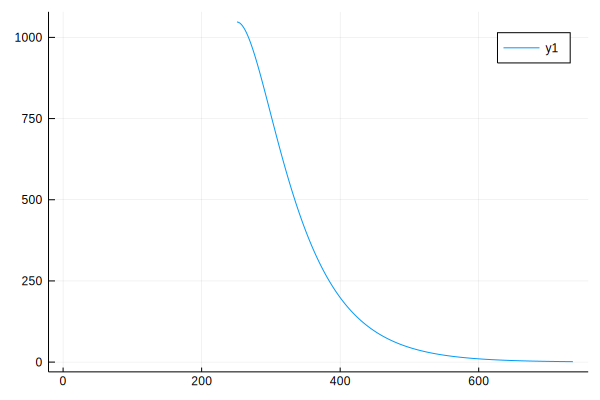

In [99]:
plot(m[:welfare, :CEMUTOTPER])

In [31]:
using NLopt
optveg(x) = -x^2
opt = Opt(:LN_SBPLX, 1)
opt.lower_bounds = [-1.]
opt.upper_bounds = [1.]
opt.xtol_rel     = 1e-8
opt.max_objective = optveg
out = optimize(opt, [.5])

(0.0, [0.5], :FORCED_STOP)

In [91]:
veg_outcome(0.0)

-7882.474123022103

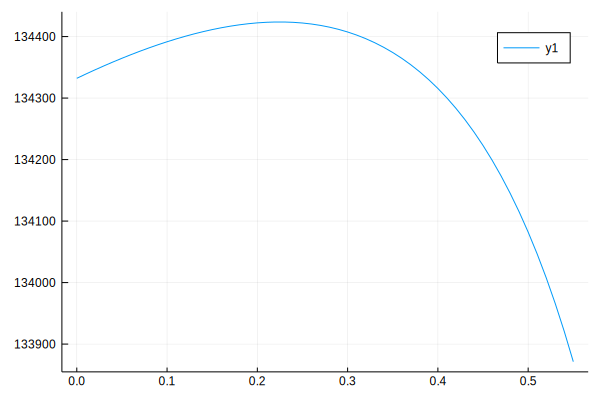

In [107]:
x = collect(0:1:55)
x = x/100
y = zeros(length(x))
    for i = 1:length(y)!
        y[i] = veg_outcome(x[i], 1.85)
    end
plot(x, y)

In [87]:
plot(x[60:80], y[60:80])

BoundsError: BoundsError: attempt to access 8-element Array{Float64,1} at index [60:80]

In [77]:
m[:welfare, :MeatPC]

736-element Array{Union{Missing, Float64},1}:
  missing          
  missing          
  missing          
  missing          
  missing          
  missing          
  missing          
  missing          
  missing          
  missing          
  missing          
  missing          
  missing          
 ⋮                 
 1.762674268772441 
 1.7626742687724415
 1.7626742687724415
 1.7626742687724413
 1.7626742687724413
 1.7626742687724415
 1.7626742687724413
 1.7626742687724413
 1.7626742687724415
 1.7626742687724415
 1.7626742687724415
 1.7626742687724413

In [78]:
.06*m[:welfare, :MeatPC]

736-element Array{Union{Missing, Float64},1}:
  missing           
  missing           
  missing           
  missing           
  missing           
  missing           
  missing           
  missing           
  missing           
  missing           
  missing           
  missing           
  missing           
 ⋮                  
 0.10576045612634646
 0.10576045612634649
 0.10576045612634649
 0.10576045612634648
 0.10576045612634648
 0.10576045612634649
 0.10576045612634648
 0.10576045612634648
 0.10576045612634649
 0.10576045612634649
 0.10576045612634649
 0.10576045612634648

In [79]:
.004*(0.10576)^(1-3.3)/(1-3.3)

-0.30506531914396234

In [1]:
using NLopt

In [8]:
opt = Opt(:LN_SBPLX, 2)
function f(x, grad)
    if length(grad)>0
        grad[1] = 6
    end
    return -x[1]^2. - x[2]^2.
end
opt.xtol_rel     = 1e-8
opt.lower_bounds = [-100, -100]
opt.upper_bounds = [100, 100]
opt.max_objective = f
init = [.5; -.5]
sol = optimize(opt, init)

(-0.0, [4.622607414496625e-163, 1.0470282653875865e-162], :XTOL_REACHED)

In [10]:
sol

(-0.0, [4.622607414496625e-163, 1.0470282653875865e-162], :XTOL_REACHED)

In [12]:
include("SCW_Analysis.jl")

┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:61
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:61
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{ExpandedIndexTypes, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:67
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:67


Ran once
Costs of Non-Veg in Baseline are [161337.33936651584, 135183.23981900452, 112568.80542986425, 92753.52036199094, 75197.80090497738, 59498.01357466063, 45344.9592760181, 32497.69230769231, 20764.615384615383, 9991.746606334842, 53.42986425339367, -9154.199095022625, -17717.45701357466, -25708.904977375565, -33190.407239819004, -40214.515837104074, -46826.74208144796, -53066.20814479638, -58966.88687782805, -64559.05882352941][2]
Costs of Beef in Baseline are 54.52488687782805
Costs of Pork in Baseline are 31.739819004524886
Costs of Poultry in Baseline are 314.99095022624437


┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:61
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:61
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{ExpandedIndexTypes, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:67
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:67


LoadError: MethodError: no method matching optimize(::Opt, ::Float64)
Closest candidates are:
  optimize(::Opt, !Matched::AbstractArray{#s33,1} where #s33<:Real) at C:\Users\Kevin\.julia\packages\NLopt\eqN9a\src\NLopt.jl:611

In [19]:
include("helpers_SCWOptimization.jl")
m = create_AnimalWelfareOpt()
function optveg(x, grad)
	if length(grad)>0
	grad[1] = 1000
	end
    result = veg_outcome(x[1])
	return result
end

opt = Opt(:LN_SBPLX, 1)
opt.lower_bounds=[0.]
opt.upper_bounds=[.9999999999]
init = [.5]
opt.xtol_rel = 1e-4
opt.max_objective = optveg
sol = optimize(opt, init)

┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:61
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:61
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{ExpandedIndexTypes, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:67
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:67


(121857.07031044642, [0.7388916015386109], :XTOL_REACHED)

In [26]:
include("helpers_SCWOptimization.jl")
m = create_AnimalWelfareOpt()
function optanimals(x, grad)
	if length(grad)>0
	grad[1] = 1000
	end
    result = ByAnimal_outcome(x[1], x[2], x[3])
	return result
end

opt = Opt(:LN_SBPLX, 3)
opt.lower_bounds= zeros(3)
opt.upper_bounds= ones(3)
init = [.5; .5; .5]
opt.xtol_rel = 1e-4
opt.max_objective = optanimals
sol = optimize(opt, init)

┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:61
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:61
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{ExpandedIndexTypes, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:67
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:67


ErrorException: error in method definition: function Base./ must be explicitly imported to be extended

In [73]:
include("helpers_SCWOptimization.jl")
ByAnimals_outcome([.5; .5; .5])

┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:61
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:61
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{ExpandedIndexTypes, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:67
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:67


MethodError: MethodError: no method matching getindex(::Float64, ::Symbol, ::Symbol)
Closest candidates are:
  getindex(::Number) at number.jl:75
  getindex(::Number, !Matched::Integer) at number.jl:77
  getindex(::Number, !Matched::Integer...) at number.jl:82
  ...

In [31]:
ByAnimal_outcome

ByAnimal_outcome (generic function with 2 methods)

In [32]:
function ByAnimal_outcome(x::Array{Float64, 1}, Suffering=1.0)
	New 	= create_AnimalWelfareOpt()
	set_param!(New, :farm, :BeefReduc, x[1])
	set_param!(New, :farm, :PoultryReduc, x[2])
	set_param!(New, :farm, :PorkReduc, x[3])
	set_param!(m, :welfare, :CowEquiv, SufferingEquiv)
	set_param!(m, :welfare, :PigEquiv, SufferingEquiv)
	set_param!(m, :welfare, :ChickenEquiv, SufferingEquiv)
	run(New)
	return m[:welfare, :UTILITY]
end

ByAnimal_outcome (generic function with 4 methods)

In [34]:
ByAnimal_outcome([.5; .5; .5])

MethodError: MethodError: no method matching set_param!(::Float64, ::Symbol, ::Symbol, ::Array{Float64,1})
Closest candidates are:
  set_param!(!Matched::Mimi.ModelDef, ::Symbol, ::Symbol, ::Any) at C:\Users\Kevin\.julia\packages\Mimi\7mrNq\src\core\defs.jl:339
  set_param!(!Matched::Mimi.ModelDef, ::Symbol, ::Symbol, ::Any, !Matched::Any) at C:\Users\Kevin\.julia\packages\Mimi\7mrNq\src\core\defs.jl:339
  set_param!(!Matched::Model, ::Symbol, ::Symbol, ::Any) at C:\Users\Kevin\.julia\packages\Mimi\7mrNq\src\core\model.jl:380
  ...

In [76]:
function ByAnimal_outcome(x)
	New 	= create_AnimalWelfareOpt()
	set_param!(New, :farm, :BeefReduc, x[1])
	set_param!(New, :farm, :PoultryReduc, x[2])
	set_param!(New, :farm, :PorkReduc, x[3])
	run(New)
	return m[:welfare, :UTILITY]
end

ByAnimal_outcome (generic function with 8 methods)

In [77]:
ByAnimal_outcome([.5 .5 .5])

MethodError: MethodError: no method matching getindex(::Float64, ::Symbol, ::Symbol)
Closest candidates are:
  getindex(::Number) at number.jl:75
  getindex(::Number, !Matched::Integer) at number.jl:77
  getindex(::Number, !Matched::Integer...) at number.jl:82
  ...

In [59]:
New 	= create_AnimalWelfareOpt()
	set_param!(New, :farm, :BeefReduc, .5)
	set_param!(New, :farm, :PoultryReduc, .5)
	set_param!(New, :farm, :PorkReduc, .5)
run(New)

In [60]:
explore(New)

Electron.Window(Application(Base.PipeEndpoint(Base.Libc.WindowsRawSocket(0x0000000000000670) open, 0 bytes waiting), Process(`'C:\Users\Kevin\.julia\packages\Electron\aRIgh\src\..\deps\electron\electron.exe' 'C:\Users\Kevin\.julia\packages\Electron\aRIgh\src\main.js' '\\.\pipe\juliaelectron-8032-1' '\\.\pipe\juliaelectron-sysnotify-8032-1' 8VfCWiO990ui4dMKP1RszRGkgvBviciKL9oMTVPMWbB1j4Nhkrk7Jt3LqP4kwp2jcSC84suh87jJRGNIfy5qsR7AMEd32FMoHWbbObV8JsGN1zkO3zGtmkh2nyCFJFIeb1CRJYWk0v2Ftd4FboN8e428nQLE3Z3TWamYyMJmHHs=`, ProcessRunning), [1 window]), 1, true, Channel{Any}(sz_max:128,sz_curr:0))

In [74]:
function f(x)
   y = x[1] + x[2] + x[3]
    return y
end


f (generic function with 2 methods)

In [75]:
f([1 2 3])

6